<a href="https://colab.research.google.com/github/ravishankar-cloud/machine-learning/blob/main/Traffic_signs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [37]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.utils.np_utils import to_categorical
from keras.layers import Dropout, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
import random
import pickle
np.random.seed(0)
import pandas as pd


In [38]:
! git clone https://bitbucket.org/jadslim/german-traffic-signs

fatal: destination path 'german-traffic-signs' already exists and is not an empty directory.


In [39]:
ls

german-traffic-signs/  sample_data/


In [40]:
ls german-traffic-signs

signnames.csv  test.p  train.p  valid.p


In [41]:
with open('german-traffic-signs/train.p','rb') as f:
  train_data=pickle.load(f)

with open('german-traffic-signs/valid.p','rb') as f:
  val_data=pickle.load(f)

with open('german-traffic-signs/test.p','rb') as f:
  test_data=pickle.load(f)

print(type(train_data))

X_train,Y_train =train_data['features'],train_data['labels']
X_val,Y_val=val_data['features'],val_data['labels']
X_test,Y_test=test_data['features'],test_data['labels']

<class 'dict'>


In [42]:
print(X_test.shape)
print(X_val.shape)
print(X_train.shape)

(12630, 32, 32, 3)
(4410, 32, 32, 3)
(34799, 32, 32, 3)


In [43]:
assert(X_train.shape[0]== Y_train.shape[0])," The number of images is not equal to number of labels"
assert(X_val.shape[0]== Y_val.shape[0])," The number of images is not equal to number of labels"
assert(X_test.shape[0]== Y_test.shape[0])," The number of images is not equal to number of labels"
assert(X_train.shape[1:]==(32,32,3)), "The dimensions of the image are not 32 X 32 X 3"
assert(X_val.shape[1:]==(32,32,3)), "The dimensions of the image are not 32 X 32 X 3"
assert(X_test.shape[1:]==(32,32,3)), "The dimensions of the image are not 32 X 32 X 3"

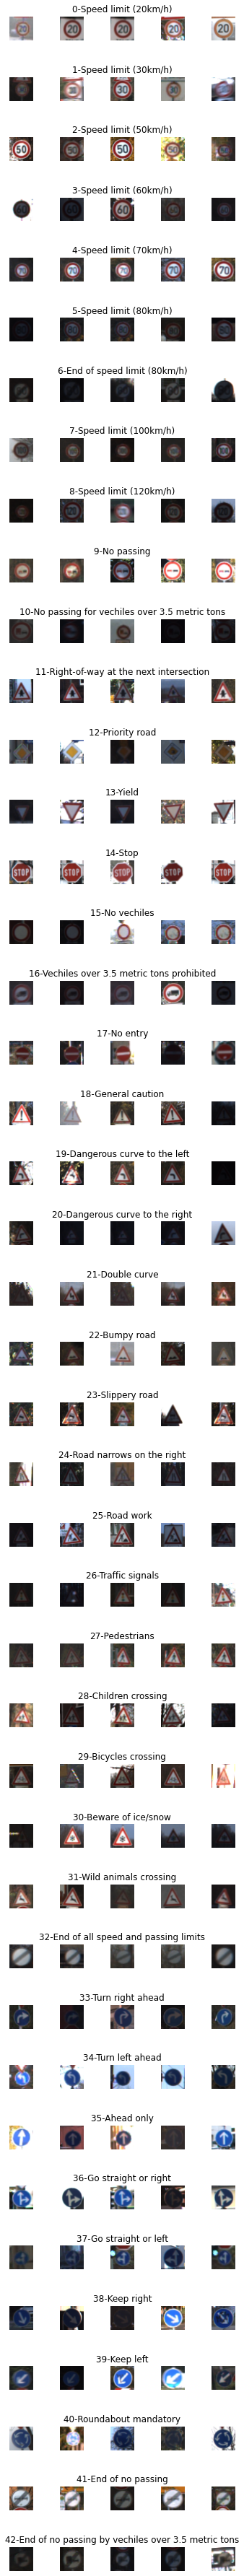

In [44]:
data=pd.read_csv('german-traffic-signs/signnames.csv')
num_of_samples=[]

cols=5
num_classes=43
fig,axs=plt.subplots(nrows=num_classes,ncols=cols,figsize=(5,50))
fig.tight_layout()
for i in range(cols):
  for j, row in data.iterrows():
    x_selected=X_train[Y_train==j]
    axs[j][i].imshow(x_selected[random.randint(0,(len(x_selected) - 1)), :, :], cmap=plt.get_cmap('gray'))
    axs[j][i].axis("off")
    if i==2:
      axs[j][i].set_title(str(j)+ '-'+row["SignName"])
      num_of_samples.append(len(x_selected))

[180, 1980, 2010, 1260, 1770, 1650, 360, 1290, 1260, 1320, 1800, 1170, 1890, 1920, 690, 540, 360, 990, 1080, 180, 300, 270, 330, 450, 240, 1350, 540, 210, 480, 240, 390, 690, 210, 599, 360, 1080, 330, 180, 1860, 270, 300, 210, 210]


Text(0, 0.5, 'Number of images')

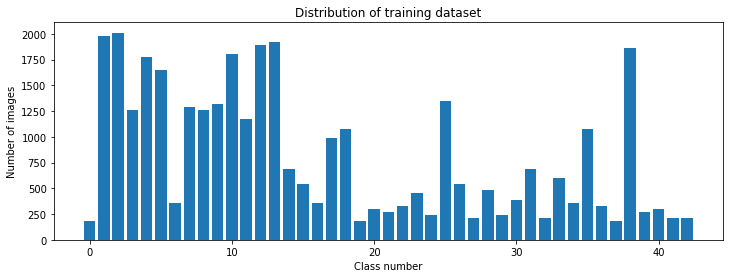

In [45]:
print(num_of_samples)
plt.figure(figsize=(12,4))
plt.bar(range(0,num_classes),num_of_samples)
plt.title("Distribution of training dataset")
plt.xlabel("Class number")
plt.ylabel("Number of images")

(32, 32, 3)
36


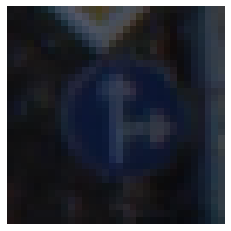

In [46]:
import cv2
plt.imshow(X_train[1000])
plt.axis("off")
print(X_train[1000].shape)
print(Y_train[1000])

(32, 32)


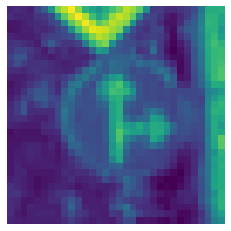

In [47]:
def grayscale(img):
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    return img
img = grayscale(X_train[1000])
plt.imshow(img)
plt.axis("off")
print(img.shape)

(32, 32)


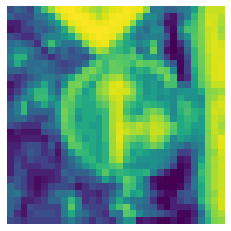

In [48]:
def equalize(img):
  img=cv2.equalizeHist(img)
  return img

img=equalize(img)
plt.imshow(img)
plt.axis("off")
print(img.shape)

In [49]:
def preprocessing(img):
  img=grayscale(img)
  img=equalize(img)
  img=img/255
  return img

X_train=np.array(list(map(preprocessing,X_train)))
X_val=np.array(list(map(preprocessing,X_val)))
X_test=np.array(list(map(preprocessing,X_test)))

(34799, 32, 32)


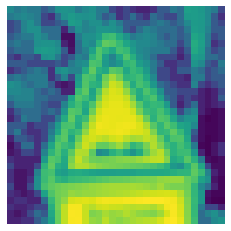

In [50]:
plt.imshow(X_train[random.randint(0,len(X_train)-1)])
plt.axis("off")
print(X_train.shape)

In [51]:
X_train = X_train.reshape(34799, 32, 32, 1)
X_test = X_test.reshape(12630, 32, 32, 1)
X_val = X_val.reshape(4410, 32, 32, 1)



In [52]:
from keras.preprocessing.image import ImageDataGenerator
datagen=ImageDataGenerator(width_shift_range=0.1,
                          height_shift_range=0.1,
                          zoom_range=0.2,
                          shear_range=0.1,
                          rotation_range=10.)

datagen.fit(X_train)

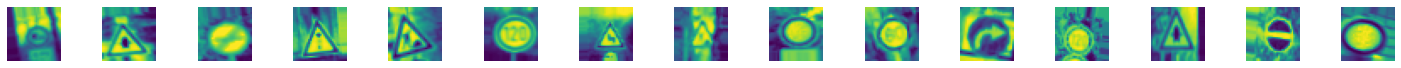

In [53]:
batches=datagen.flow(X_train,Y_train,batch_size=20)
X_batch, y_batch = next(batches)

fig, axs = plt.subplots(1,15,figsize=(20,5))
fig.tight_layout()

for i in range(15):
  axs[i].imshow(X_batch[i].reshape(32,32))
  axs[i].axis('off')

In [54]:
Y_train=to_categorical(Y_train,43)
Y_test=to_categorical(Y_test,43)
Y_val=to_categorical(Y_val,43)

In [55]:
from keras.layers.pooling.max_pooling2d import MaxPool2D
def modified_model():
  model = Sequential()
  model.add(Conv2D(60, (5, 5), input_shape=(32, 32, 1), activation='relu'))
  model.add(Conv2D(60, (5, 5), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  
  model.add(Conv2D(30, (3, 3), activation='relu'))
  model.add(Conv2D(30, (3, 3), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  
  model.add(Flatten())
  model.add(Dense(500, activation='relu'))
  model.add(Dropout(0.5))
  model.add(Dense(43, activation='softmax'))
  
  model.compile(Adam(lr = 0.001), loss='categorical_crossentropy', metrics=['accuracy'])
  return model

In [56]:
model=modified_model()
print(model.summary())



Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 28, 28, 60)        1560      
                                                                 
 conv2d_5 (Conv2D)           (None, 24, 24, 60)        90060     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 12, 12, 60)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 10, 10, 30)        16230     
                                                                 
 conv2d_7 (Conv2D)           (None, 8, 8, 30)          8130      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 4, 4, 30)         0         
 2D)                                                  

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [74]:
history=model.fit(datagen.flow(X_train,Y_train,batch_size=50),steps_per_epoch = len(X_train)//100,epochs=10,validation_data=(X_val,Y_val),shuffle=1)

Epoch 1/10
347/347 [==============================] - 8s 24ms/step - loss: 0.0640 - accuracy: 0.9813 - val_loss: 0.0557 - val_accuracy: 0.9855
Epoch 2/10
347/347 [==============================] - 8s 24ms/step - loss: 0.0620 - accuracy: 0.9810 - val_loss: 0.0770 - val_accuracy: 0.9791
Epoch 3/10
347/347 [==============================] - 8s 24ms/step - loss: 0.0640 - accuracy: 0.9799 - val_loss: 0.0801 - val_accuracy: 0.9832
Epoch 4/10
347/347 [==============================] - 8s 24ms/step - loss: 0.0588 - accuracy: 0.9827 - val_loss: 0.0345 - val_accuracy: 0.9916
Epoch 5/10
347/347 [==============================] - 8s 24ms/step - loss: 0.0709 - accuracy: 0.9787 - val_loss: 0.0399 - val_accuracy: 0.9866
Epoch 6/10
347/347 [==============================] - 8s 24ms/step - loss: 0.0618 - accuracy: 0.9812 - val_loss: 0.0491 - val_accuracy: 0.9880
Epoch 7/10
347/347 [==============================] - 8s 24ms/step - loss: 0.0620 - accuracy: 0.9810 - val_loss: 0.0662 - val_accuracy: 0.9853

Text(0.5, 1.0, 'accuracy')

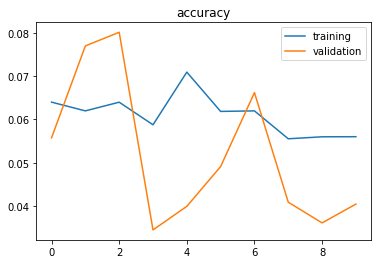

In [75]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training','validation'])
plt.title ('accuracy')

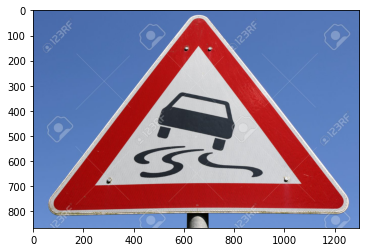

In [59]:
import requests
from PIL import Image
url = 'https://previews.123rf.com/images/bwylezich/bwylezich1608/bwylezich160800375/64914157-german-road-sign-slippery-road.jpg'
r = requests.get(url, stream=True)
img = Image.open(r.raw)
plt.imshow(img, cmap=plt.get_cmap('gray'))

(32, 32)


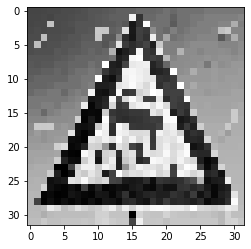

In [60]:
#Preprocess image
 
img = np.asarray(img)
img = cv2.resize(img, (32, 32))
img = preprocessing(img)
plt.imshow(img, cmap = plt.get_cmap('gray'))
print(img.shape)
 
#Reshape reshape
 
img = img.reshape(1, 32, 32, 1)
 


In [61]:

prediction=model.predict(img)
p=np.argmax(prediction, axis=1)
print("prediction is", p)

1/1 [==============================] - 0s 65ms/step
prediction is [25]
